In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Image, display

IMPORT DATA

In [41]:
df = pd.read_excel('../dataset/job_fix.xlsx', sheet_name=0)

In [42]:
df.head

<bound method NDFrame.head of       Sr.No.  Course Job profession Student  Linguistic  Musical  Bodily  \
0        1.0     NaN   Astronomer\n      S1          11        5      12   
1        NaN     NaN   Astronomer\n      S2          12        6      12   
2        NaN     NaN   Astronomer\n      S3          13        7      12   
3        NaN     NaN   Astronomer\n      S4          14        8      12   
4        NaN     NaN   Astronomer\n      S5          13        9      12   
...      ...     ...            ...     ...         ...      ...     ...   
3595     NaN     NaN     Technician   S3596           8        7      15   
3596     NaN     NaN     Technician   S3597           9        8      16   
3597     NaN     NaN     Technician   S3598          10        8      17   
3598     NaN     NaN     Technician   S3599           6        9      19   
3599     NaN     NaN     Technician   S3600           8        9      18   

      Logical - Mathematical  Spatial-Visualization  Inte

VISUALZATION DATA

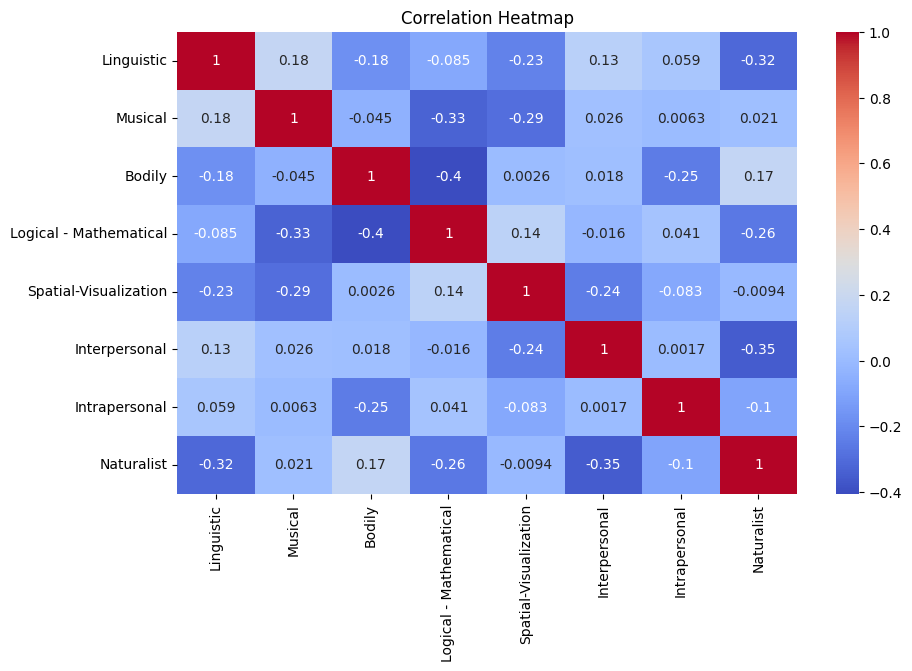

In [43]:
import seaborn as sns

corr = df.drop(columns=[
    'Sr.No.', 
    'Course', 
    'Job profession', 
    'Student',
    's/p',
    'P1',
    'P2',
    'P3',
    'P4',
    'P5',
    'P6',
    'P7',
    'P8']).corr()


plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

HOLDING DATA

In [62]:
# X = df.drop(list(df.columns[0:4]) + ['s/'], axis=1)
X = df.drop(list(df.columns[0:4]) + list(df.columns[12:]), axis=1)
X

,Linguistic,Musical,Bodily,Logical - Mathematical,Spatial-Visualization,Interpersonal,Intrapersonal,Naturalist
0,11,5,12,16,17,11,18,19
1,12,6,12,16,16,11,18,19
2,13,7,12,16,15,11,18,19
3,14,8,12,16,19,11,18,19
4,13,9,12,16,20,11,19,19
...,...,...,...,...,...,...,...,...
3595,8,7,15,12,14,15,14,11
3596,9,8,16,11,13,16,14,12
3597,10,8,17,12,11,17,14,14
3598,6,9,19,13,13,18,13,11


In [45]:
# 优化字符串到数值的转换
grade_cols = [f'P{i}' for i in range(1, 9)]
for col in grade_cols:
    # 将字符串等级（'POOR', 'AVG', 'BEST'）转换为数值（0, 1, 2），并转为float类型
    X[col] = X[col].replace({'POOR': 0, 'AVG': 1, 'BEST': 2}).astype('Int64')
X

/var/folders/lp/hgbg7xdj7ql_zq41nk0lt6yw0000gn/T/ipykernel_6933/2816526221.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[col] = X[col].replace({'POOR': 0, 'AVG': 1, 'BEST': 2}).astype('Int64')


,Linguistic,Musical,Bodily,Logical - Mathematical,Spatial-Visualization,Interpersonal,Intrapersonal,Naturalist,P1,P2,P3,P4,P5,P6,P7,P8
0,11,5,12,16,17,11,18,19,1,0,1,2,2,1,2,2
1,12,6,12,16,16,11,18,19,1,0,1,2,2,1,2,2
2,13,7,12,16,15,11,18,19,1,0,1,2,2,1,2,2
3,14,8,12,16,19,11,18,19,1,0,1,2,2,1,2,2
4,13,9,12,16,20,11,19,19,1,0,1,2,2,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,8,7,15,12,14,15,14,11,0,0,2,1,1,2,1,1
3596,9,8,16,11,13,16,14,12,0,0,2,1,1,2,1,1
3597,10,8,17,12,11,17,14,14,0,0,2,1,1,2,1,1
3598,6,9,19,13,13,18,13,11,0,0,2,1,1,2,1,1


In [63]:
y = df['Job profession'].values
y

array(['Astronomer\n', 'Astronomer\n', 'Astronomer\n', ..., 'Technician',
       'Technician', 'Technician'], dtype=object)

In [68]:
unique_jobs, y_encoded =  np.unique(y, return_inverse=True)
y_encoded

array([ 5,  5,  5, ..., 69, 69, 69])

SCALE DATA STANDARDIZATION

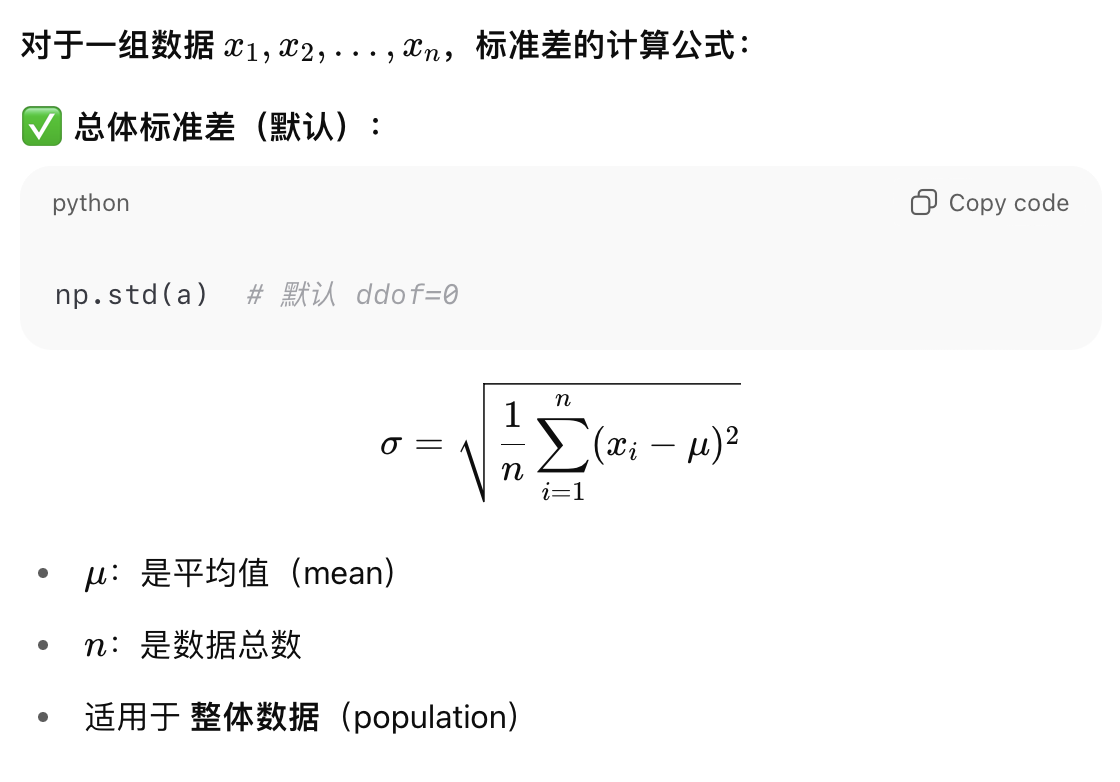

In [52]:
display(Image(filename='../photos/fomulation/std.png')) 

In [54]:
'''
该语句用于计算 X 每一列(每个特征)的均值(mean),结果是一个包含所有特征均值的一维数组。
>>> X: 通常为二维数组或 DataFrame, shape 为 (样本数, 特征数)。
>>> axis=0: 表示对每一列求均值（即每个特征的均值）。
常用于数据标准化、归一化等预处理步骤。
'''
mean = np.mean(X, axis=0)
mean

Linguistic                13.064167
Musical                    9.538333
Bodily                    12.080278
Logical - Mathematical    15.510556
Spatial-Visualization      9.771389
Interpersonal             15.546389
Intrapersonal             14.764167
Naturalist                11.035556
P1                            1.125
P2                         0.458333
P3                         0.930556
P4                         1.597222
P5                         0.486111
P6                          1.59655
P7                         1.472222
P8                         0.736316
dtype: Float64

In [57]:
'''
该语句用于计算 X 每一列(每个特征)的标准差(standard deviation), 结果是一个包含所有特征标准差的一维数组。
- X:通常为二维数组或 DataFrame, shape 为 (样本数, 特征数)。
- mean:每列的均值。
- (X - mean)**2:每个元素与均值的差的平方。
- np.sum(..., axis=0)：对每一列求和。
- 1/(X.shape[0])：除以样本数，得到方差（无偏估计应为 n-1)。
- np.sqrt(...)：对方差开方，得到标准差。
常用于数据标准化、归一化等预处理步骤。
'''
std = np.sqrt(1/(X.shape[0]) * np.sum((X - mean)**2, axis=0))
std

Linguistic                3.705408
Musical                   4.269879
Bodily                    4.297409
Logical - Mathematical    3.842728
Spatial-Visualization     3.719276
Interpersonal             3.522556
Intrapersonal             3.586037
Naturalist                 4.32369
P1                        0.665363
P2                         0.74419
P3                        0.787513
P4                        0.680272
P5                        0.666522
P6                        0.615764
P7                        0.644899
P8                        0.763538
dtype: Float64

In [58]:
X_scaled = (X - mean) / std
X_scaled

,Linguistic,Musical,Bodily,Logical - Mathematical,Spatial-Visualization,Interpersonal,Intrapersonal,Naturalist,P1,P2,P3,P4,P5,P6,P7,P8
0,-0.557069,-1.062872,-0.018681,0.127369,1.943553,-1.290650,0.902342,1.842048,-0.187867,-0.615882,0.088182,0.592083,2.271326,-0.968795,0.818388,1.655039
1,-0.287193,-0.828673,-0.018681,0.127369,1.674684,-1.290650,0.902342,1.842048,-0.187867,-0.615882,0.088182,0.592083,2.271326,-0.968795,0.818388,1.655039
2,-0.017317,-0.594474,-0.018681,0.127369,1.405814,-1.290650,0.902342,1.842048,-0.187867,-0.615882,0.088182,0.592083,2.271326,-0.968795,0.818388,1.655039
3,0.252559,-0.360276,-0.018681,0.127369,2.481292,-1.290650,0.902342,1.842048,-0.187867,-0.615882,0.088182,0.592083,2.271326,-0.968795,0.818388,1.655039
4,-0.017317,-0.126077,-0.018681,0.127369,2.750162,-1.290650,1.181202,1.842048,-0.187867,-0.615882,0.088182,0.592083,2.271326,-0.968795,0.818388,1.655039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,-1.366696,-0.594474,0.679415,-0.913558,1.136945,-0.155111,-0.213095,-0.008223,-1.690806,-0.615882,1.358001,-0.877917,0.771001,0.655202,-0.732242,0.345346
3596,-1.096820,-0.360276,0.912113,-1.173790,0.868075,0.128773,-0.213095,0.223061,-1.690806,-0.615882,1.358001,-0.877917,0.771001,0.655202,-0.732242,0.345346
3597,-0.826944,-0.360276,1.144811,-0.913558,0.330336,0.412658,-0.213095,0.685628,-1.690806,-0.615882,1.358001,-0.877917,0.771001,0.655202,-0.732242,0.345346
3598,-1.906448,-0.126077,1.610208,-0.653326,0.868075,0.696543,-0.491954,-0.008223,-1.690806,-0.615882,1.358001,-0.877917,0.771001,0.655202,-0.732242,0.345346


In [60]:
X_scaled.shape

(3600, 16)

SCALE DATA WITH MIN MAX BASED ON BELOW COMPARING

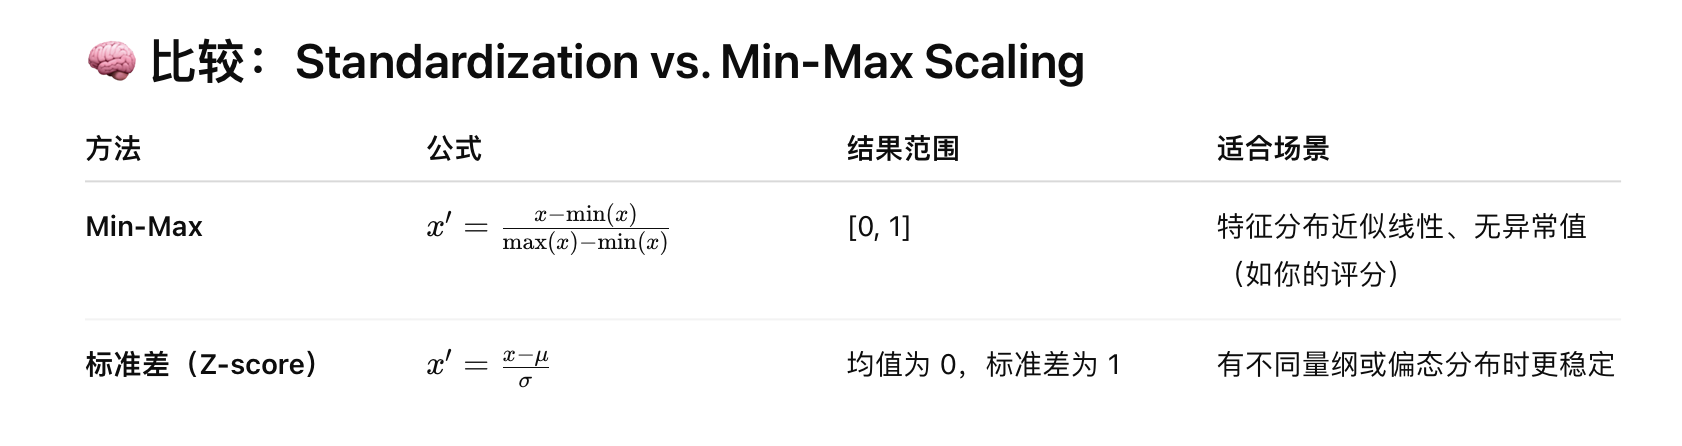

In [71]:
display(Image(filename='../photos/fomulation/compare_std_min_max_scaling.png')) 

In [72]:
X.shape

(3600, 8)

In [73]:
X.values

array([[11,  5, 12, ..., 11, 18, 19],
       [12,  6, 12, ..., 11, 18, 19],
       [13,  7, 12, ..., 11, 18, 19],
       ...,
       [10,  8, 17, ..., 17, 14, 14],
       [ 6,  9, 19, ..., 18, 13, 11],
       [ 8,  9, 18, ..., 19, 14, 11]])

In [112]:
def min_max_scale(X):
    """
    对二维数组 X 进行 Min-Max 缩放，每一列单独缩放到 [0, 1] 区间。
    参数:
        X: List[List[float]] 或 numpy.ndarray, n行m列
    返回:
        X_scaled: 同样大小的二维列表，每列值缩放到 [0, 1]
    """ 
    n_rows = len(X)
    n_cols = len(X[0])
    X_scaled = [[0.0 for _ in range(n_cols)] for _ in range(n_rows)]

    for col in range(n_cols):

        col_vals = [X[row][col] for row in range(n_rows)]
        col_min = min(col_vals)
        col_max = max(col_vals)
        range_val = col_max - col_min

        for row in range(n_rows):
            if range_val == 0:
                X_scaled[row][col] = 0.0   # 避免除以0
            else:
                X_scaled[row][col] = (X[row][col] - col_min) / range_val

    return np.array(X_scaled)



In [113]:
X_scaled = min_max_scale(X.values)
X_scaled

array([[0.4       , 0.        , 0.46666667, ..., 0.5       , 0.86666667,
        0.95      ],
       [0.46666667, 0.06666667, 0.46666667, ..., 0.5       , 0.86666667,
        0.95      ],
       [0.53333333, 0.13333333, 0.46666667, ..., 0.5       , 0.86666667,
        0.95      ],
       ...,
       [0.33333333, 0.2       , 0.8       , ..., 0.83333333, 0.6       ,
        0.7       ],
       [0.06666667, 0.26666667, 0.93333333, ..., 0.88888889, 0.53333333,
        0.55      ],
       [0.2       , 0.26666667, 0.86666667, ..., 0.94444444, 0.6       ,
        0.55      ]])

VISUALIZATION DATA

SOFTMAX REGRESSION FUNCTION

In [80]:
def softmax(Z):
    """
    计算输入数组每一列的 softmax。

    softmax 函数将原始得分(logits)转换为概率，
    通过对每一列进行指数运算并归一化实现。

    参数
    ----------
    Z : ndarray
        任意形状的 NumPy 数组。通常是一个二维数组，其中每一列
        表示一组不同类别的得分。

    返回值
    -------
    ndarray
        与 `Z` 形状相同的数组，每一列包含经过 softmax 变换后的值
        （即概率，和为 1)。

    备注
    -----
    - 此函数在 `axis=0` 方向上应用 softmax, 因此假设每一列是一个独立的得分集。
    - 如果需要在每一行上应用 softmax, 应在 `np.sum()` 中设置 `axis=1`。

    示例
    --------
    >>> Z = np.array([[1, 2, 3],
                      [1, 2, 3]])
    ...
    >>> softmax(Z)
    array([[0.5, 0.5, 0.5],
           [0.5, 0.5, 0.5]])
    """

    exp_Z = np.exp(Z)
    return exp_Z / np.sum(exp_Z, axis=0, keepdims=True)

In [83]:
from scipy import sparse

def convert_labels(y, C):
    """
    将标签向量转换为独热编码(One-Hot Encoding)格式。

    参数
    ----------
    y : ndarray
        一维整数数组，表示类别标签。每个元素的取值应在 [0, C-1] 之间。
        例如: y = [0, 2, 1, 2]

    C : int
        总类别数(classes 的数量）。

    返回值
    -------
    Y : ndarray
        二维 NumPy 数组，形状为 (C, len(y))，每一列是 y 中对应标签的独热编码形式。
        即第 i 列是第 i 个标签的 one-hot 表示。

    示例
    --------
    >>> y = np.array([0, 2, 1])
    >>> C = 3
    >>> convert_labels(y, C)
    array([[1., 0., 0.],
           [0., 0., 1.],
           [0., 1., 0.]])

    说明
    --------
    - 使用 SciPy 的 `sparse.coo_matrix` 创建稀疏矩阵，再转换为普通 NumPy 数组。
    - 每个标签对应矩阵中的一列, one-hot 编码中对应标签的位置为 1, 其余为 0。
    """
    Y = sparse.coo_matrix((np.ones_like(y), (y, np.arange(len(y)))), shape=(C, len(y))).toarray()
    return Y

In [ ]:
def cost(W, X, Y):
    """
    计算交叉熵损失(Cross-Entropy Loss)。

    该函数用于计算多类分类中的交叉熵损失，假设使用 softmax 激活函数。
    它基于模型预测值 A 和真实标签 Y 之间的差异进行计算。

    参数
    ----------
    W : ndarray
        权重矩阵，形状为 (num_features, num_classes)。

    Y : ndarray
        独热编码的真实标签矩阵，形状为 (num_classes, num_samples)。

    X : ndarray
        输入特征矩阵，形状为 (num_features, num_samples)。

    返回值
    -------
    ndarray
        损失矩阵，形状与 Y 相同，表示每个样本的逐元素交叉熵损失。
        注意：该函数**未取平均或求和**，返回的是每个元素的损失值。

    示例
    --------
    >>> W = np.random.randn(4, 3)
    >>> X = np.random.randn(4, 5)
    >>> Y = np.eye(3)[:, [0, 1, 2, 1, 0]]
    >>> cost(W, Y, X)
    array([...])  # 每个元素为 -y * log(a)

    备注
    --------
    - softmax 函数被应用于 W.T @ X 得到预测概率 A。
    - 该函数返回的是未归约（未求平均或求和）的交叉熵损失。
    - 若需计算总体损失，应加上 `.sum()` 或 `.mean()`。
    """
    A = softmax(np.dot(W.T, X))
    return -(Y * np.log(A))

GRADIENT DESCENT

In [124]:
def grad(A, X, Y):
    """
    计算 softmax 输出与真实标签之间的误差梯度，用于反向传播。

    此函数用于计算预测值 A 与真实标签 Y 之间的差值，
    并基于该误差计算梯度，以用于权重更新。

    参数
    ----------
    A : ndarray
        模型的预测概率矩阵 (softmax 输出)，形状为 (num_classes, num_samples)。

    Y : ndarray
        独热编码的真实标签矩阵，形状同 A, 为 (num_classes, num_samples)。

    返回值
    -------
    ndarray
        梯度矩阵，形状为 (num_features, num_classes),
        是输入特征 X 与误差项的乘积（注意：此函数依赖外部定义的 X)。

    示例
    --------
    >>> A = softmax(np.dot(W.T, X))
    >>> Y = one_hot_labels
    >>> grad(A, Y)
    array([...])  # 梯度值，用于更新权重

    注意事项
    --------
    - 此函数中的变量 X **未在函数内定义**，需要在函数外部预先定义。
    - E = A - Y 表示 softmax 输出与真实标签之间的误差。
    - 最终返回的是梯度: X @ E.T (注意是 X 与误差的转置相乘）。

    建议
    --------
    - 为了函数更完整与自包含，建议将 X 作为参数传入。
      如：`def grad(A, Y, X)`，避免依赖外部变量。
    """
    E = A - Y
    return np.dot(X, E.T)

SOFTMAX REFRESSION FUNCTION

In [141]:
def softmax_regression(W_init, X, Y, eta, tol=1e-4, max_count=1000):
    
    """
    使用随机梯度下降法 (SGD) 训练 Softmax 回归模型。

    该函数以随机顺序对每个样本进行迭代训练，根据 softmax + 交叉熵损失函数
    来更新权重，直到满足收敛条件或达到最大迭代次数。

    参数
    ----------
    W_init : ndarray
        初始权重矩阵，形状为 (num_features, num_classes)。

    X : ndarray
        输入特征矩阵，形状为 (num_samples, num_features)。

    Y : ndarray
        真实标签的独热编码矩阵，形状为 (num_classes, num_samples)。

    eta : float
        学习率，用于控制梯度更新的步长。

    tol : float, 可选，默认值为 1e-4
        权重更新的收敛阈值。如果连续两次相隔 30 步的权重差小于此值，则认为已收敛。

    max_count : int, 可选，默认值为 1000
        最大迭代次数（步数）。达到此值时即使未收敛也会停止训练。

    返回值
    -------
    W : list of ndarray
        权重历史列表，每一项为一个权重矩阵，记录了训练过程中的权重更新轨迹。

    说明
    -------
    - 使用随机梯度下降 (SGD) 按样本逐个更新权重。
    - 每隔 `check_w_after` 步检查一次是否收敛（使用 L2 范数）。
    - `grad(ai, xi, yi)` 需为一个能返回梯度的函数，接受 softmax 输出、样本特征 xi 和标签 yi。
    - 输入的 X 是按样本为行，特征为列的格式，因此 `X[i, :]` 是第 i 个样本。

    示例
    --------
    >>> W_init = np.zeros((4, 3))
    >>> X = np.random.randn(100, 4)
    >>> Y = one_hot_encode(labels, num_classes=3)  # 形状为 (3, 100)
    >>> W_list = softmax_regression(W_init, X, Y, eta=0.01)
    >>> final_W = W_list[-1]
    """

    W = [W_init]
    N = len(X_scaled)
    d = X.shape[1]
    C = W_init.shape[1]

    count = 0
    check_w_after = 30

    while count < max_count:

        ids_mixed = np.random.permutation(N)

        for i in ids_mixed:
            
            xi = X[i, :].reshape(d, 1)
            yi = Y[:, i].reshape(C, 1)
            ai = softmax(np.dot(W[-1].T, xi))
            W_new = W[-1] + eta * grad(ai, xi, yi)
            
            if count % check_w_after == 0:
                if np.linalg.norm(W_new - W[-1]) < tol:
                    return W

            W.append(W_new)

    return W

GO FOR CHECK PROGRAMMING RESULT

In [104]:
C = len(unique_jobs) #class based on Y
Y = convert_labels(y_encoded, C)
Y.shape

(72, 3600)

In [114]:
X.shape

(3600, 8)

In [135]:
d = X_scaled.shape[1] #features based on X
W_init = np.random.randn(d, C)
W_init.shape

(8, 72)

In [142]:
W = softmax_regression(W_init, X_scaled, Y, 0.05)

In [143]:
W

[array([[ 7.66079645e-01, -4.88484698e-01,  1.50792278e+00,
         -2.46894481e-02, -1.65612196e-02,  4.45268111e-01,
         -2.40735263e-01, -1.26645132e+00, -4.07725352e-01,
         -1.55308851e+00,  2.76435152e-01,  1.36932346e+00,
          1.14336904e+00,  3.50135386e-02, -1.44043332e+00,
          2.67562457e+00,  3.26266665e-01,  5.67158299e-01,
          1.46301514e-01,  9.55445282e-02, -6.13311715e-01,
         -5.08803133e-01,  1.06405255e-01, -6.23304000e-01,
          5.79677107e-01, -3.53593701e-01, -1.14985796e+00,
          8.38347450e-01,  2.74710675e-01,  1.41953938e-01,
          3.37675564e-01, -4.37144920e-01, -6.91652035e-01,
          2.08142040e+00, -1.20744013e+00, -6.93986748e-01,
          5.26807998e-01,  8.19686800e-01, -7.94259524e-01,
          2.28308965e+00, -8.86969571e-02, -1.85562999e+00,
          2.68882144e-01, -4.44911803e-01,  8.25920641e-01,
          2.44905558e+00, -3.16026530e-01,  5.23979412e-02,
         -1.27892258e-01,  6.69026890e-0

PREDICTION